# Разведочный анализ данных. Исследование и визуализация данных.
# 1) Текстовое описание набора данных
В качестве набора данных мы будем использовать набор данных по кредитной истории клиентов банка: Датасет кредитная история: https://www.kaggle.com/rupakroy/credit-data

Эта задача является очень актуальной для создания разработки и поддерживания на основе новых данных системы, по одобрению кредита для клиента. Сотрудник банка может просто загрузить информацию клиента, указать величину желаемого кредита и получить ответ: стоит ли этому клиенту давать кредит на такую сумму?

Датасет состоит из одного файла:
credit_data.csv

Файл содержит следующие колонки:

* clientid - целочисленный тип данных, индекс записи в таблице. Каждая запись в датасете - новый клиент.
* income - годовой доход клиента в долларах
* age - возраст клиента
* loan - последний взятый кредит
* default - целевой признак. Имеет два значения: 1 - клиент не смог выплатить кредит, 0 - смог 


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [ ]:
data = pd.read_csv('drive/MyDrive/credit_data.csv', sep=",")

# 2) Основные характеристики датасета

In [ ]:
data.head()

,clientid,income,age,loan,default
0,1,66155.92510,59.017015,8106.532131,0
1,2,34415.15397,48.117153,6564.745018,0
2,3,57317.17006,63.108049,8020.953296,0
3,4,42709.53420,45.751972,6103.642260,0
4,5,66952.68885,18.584336,8770.099235,1


In [ ]:
# размер датасета (строки, столбцы)
data.shape
print('Всего строк: {}'.format(data.shape[0]))
print('Всего столбцов: {}'.format(data.shape[1]))

Всего строк: 2000
Всего столбцов: 5


In [ ]:
# список колонок
data.columns

Index(['clientid', 'income', 'age', 'loan', 'default'], dtype='object')

In [ ]:
# колонки с их типом данных
data.dtypes

clientid      int64
income      float64
age         float64
loan        float64
default       int64
dtype: object

In [ ]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

clientid - 0
income - 0
age - 3
loan - 0
default - 0


In [ ]:
# Основные статистические характеристки набора данных
# Статистика по clientid не имеет никакой ценности, так как это инкрементирующий счётчик
data.describe()

,clientid,income,age,loan,default
count,2000.000000,2000.000000,1997.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.807559,4444.369695,0.141500
std,577.494589,14326.327119,13.624469,3045.410024,0.348624
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,500.750000,32796.459720,28.990415,1939.708847,0.000000
50%,1000.500000,45789.117310,41.317159,3974.719418,0.000000
75%,1500.250000,57791.281670,52.587040,6432.410625,0.000000
max,2000.000000,69995.685580,63.971796,13766.051240,1.000000


In [ ]:
data['default'].unique()


array([0, 1])

Целевой признак является бинарным и содержит только значения 0 и 1.

---



# 3) Визуальное исследование датасета
Для визуального исследования могут быть использованы различные виды диаграмм, мы построим только некоторые варианты диаграмм, которые используются достаточно часто.

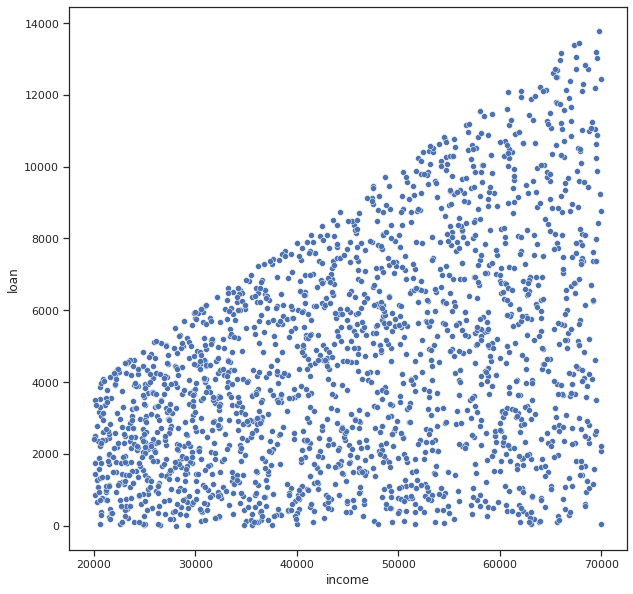

In [ ]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='income', y='loan', data=data)

Линейной зависимости не обнаружено, однако на диаграмме видно, максимальный размер кредита, который берёт человек растёт с его уровнем дохода

Посмотрим насколько на эту зависимость влияет целевой признак.


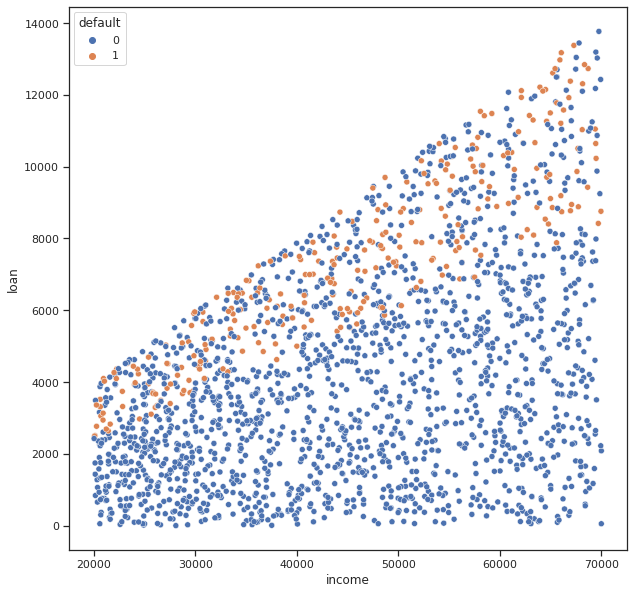

In [ ]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='income', y='loan', data=data, hue='default')

На диаграмме видно, что не выплаченные кредиты берутся при больших суммах для каждой категории дохода у клиентов.

# Гистограмма

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


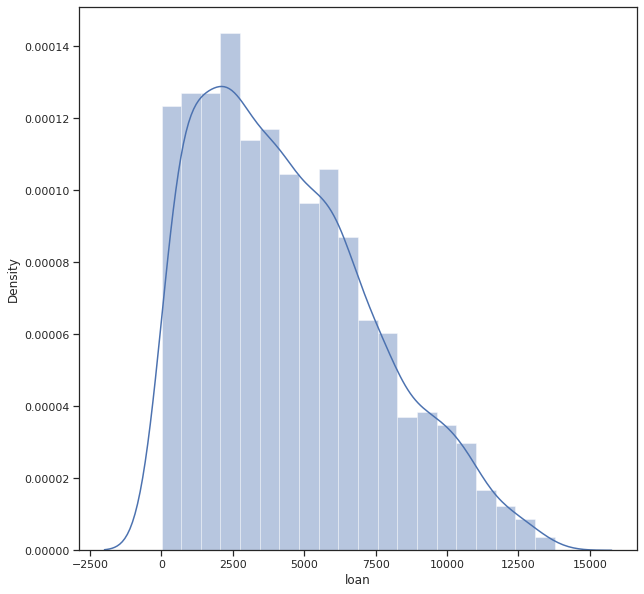

In [ ]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['loan'])

По результатам видно практически убывание по количеству взятых кредитов, в зависимости от их размера.

# Jointplot
Комбинация гистограмм и диаграмм рассеивания.

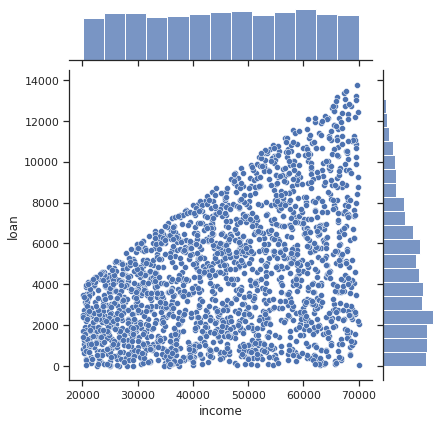

In [ ]:
sns.jointplot(x='income', y='loan', data=data)


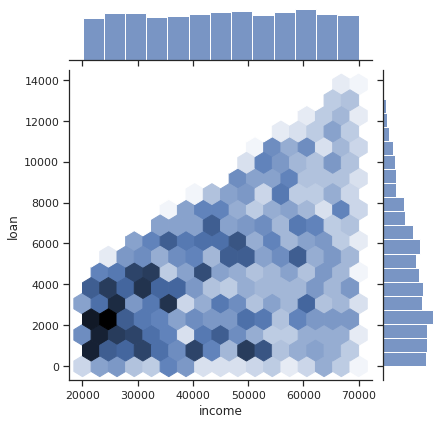

In [ ]:
sns.jointplot(x='income', y='loan', data=data, kind="hex")


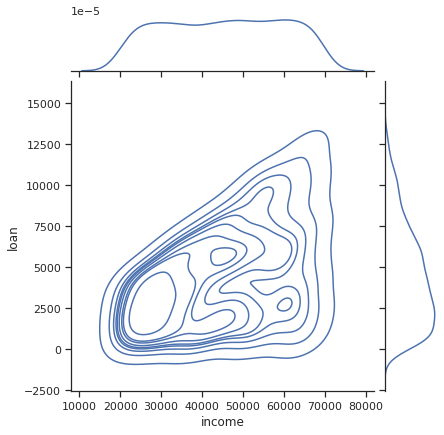

In [ ]:
sns.jointplot(x='income', y='loan', data=data, kind="kde")


# "Парные диаграммы"
Комбинация гистограмм и диаграмм рассеивания для всего набора данных.

Выводится матрица графиков. На пересечении строки и столбца, которые соответстуют двум показателям, строится диаграмма рассеивания. В главной диагонали матрицы строятся гистограммы распределения соответствующих показателей.

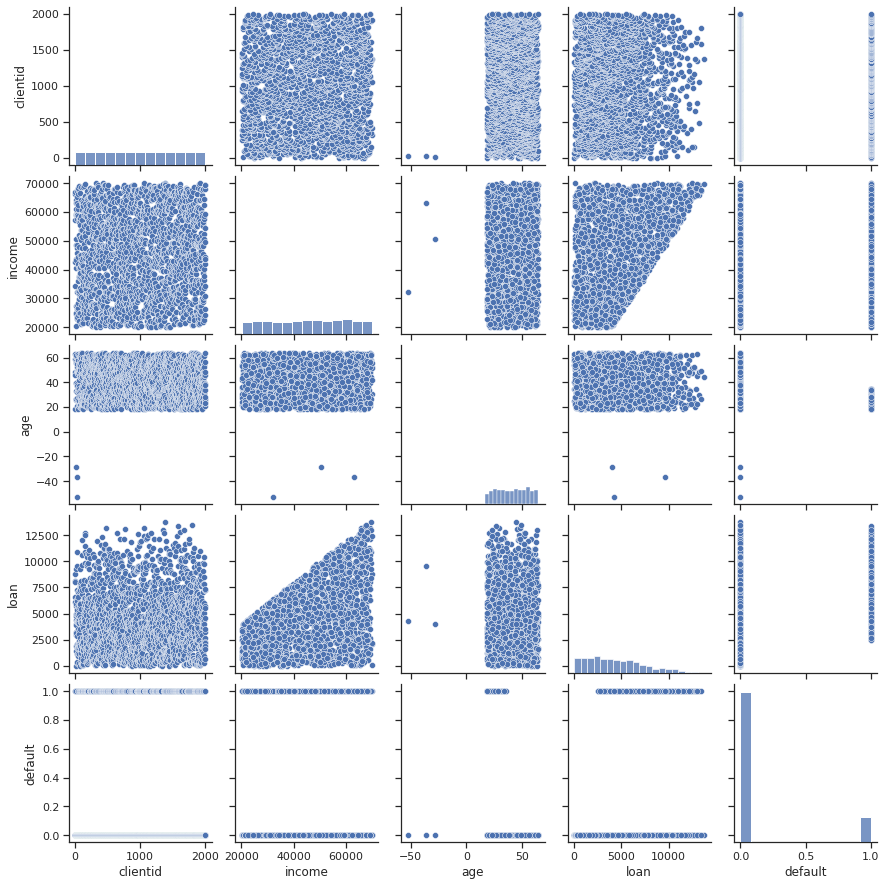

In [ ]:
sns.pairplot(data)


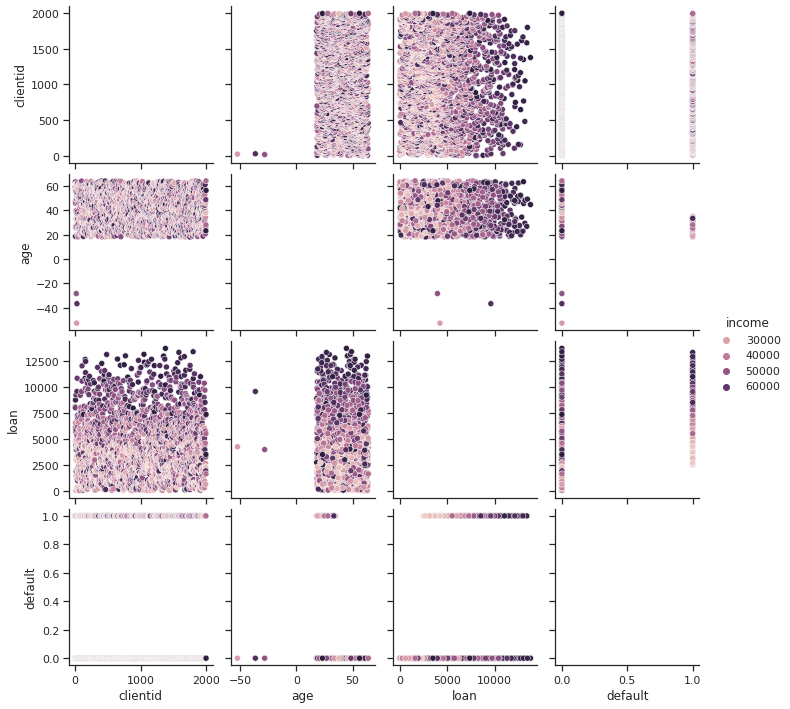

In [ ]:
sns.pairplot(data, hue="income")

# Ящик с усами (Box diagram)
Отображает одномерное распределение вероятности.

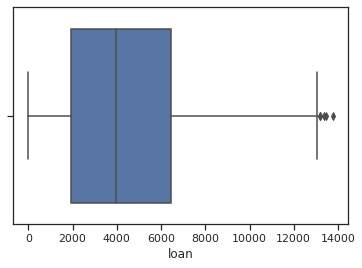

In [ ]:
sns.boxplot(x=data['loan'])


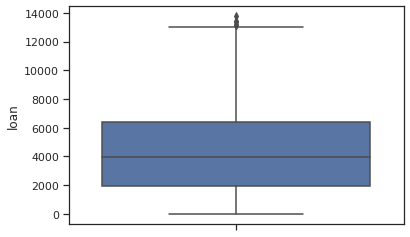

In [ ]:
# По вертикали
sns.boxplot(y=data['loan'])

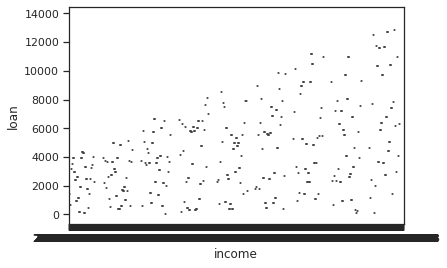

In [ ]:
# Распределение параметра loan сгруппированные по income.
sns.boxplot(x='income', y='loan', data=data)

# Violin plot
Похоже на предыдущую диаграмму, но по краям отображаются распределения плотности - https://en.wikipedia.org/wiki/Kernel_density_estimation



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


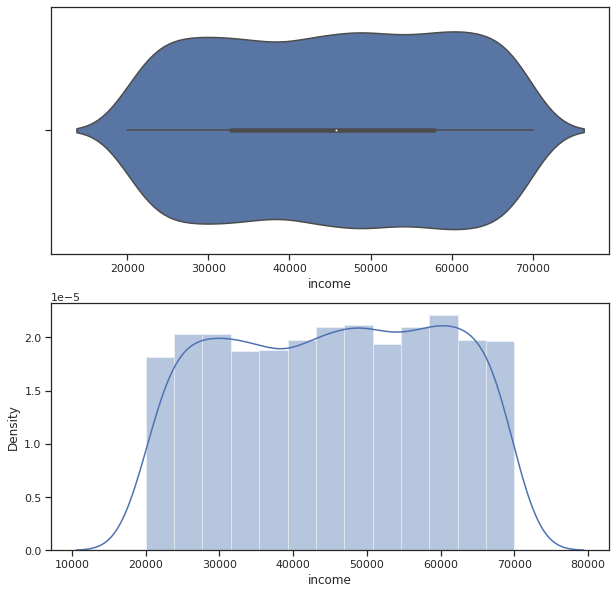

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))
sns.violinplot(ax=ax[0], x=data['income'])
sns.distplot(data['income'], ax=ax[1])

Из приведенных графиков видно, что violinplot действительно показывает распределение плотности.



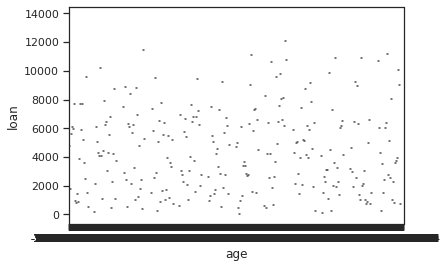

In [ ]:
sns.violinplot(x='age', y='loan', data=data)


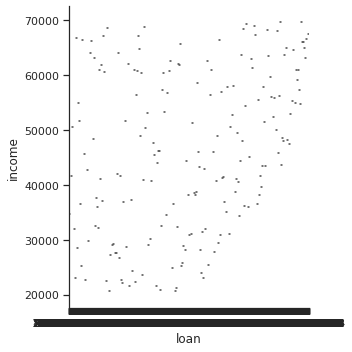

In [ ]:
sns.catplot(y='income', x='loan', data=data, kind="violin", split=True)


# 4) Информация о корреляции признаков
Проверка корреляции признаков позволяет решить две задачи:

1) Понять какие признаки (колонки датасета) наиболее сильно коррелируют с целевым признаком (в нашем примере это колонка "default"). Именно эти признаки будут наиболее информативными для моделей машинного обучения. Признаки, которые слабо коррелируют с целевым признаком, можно попробовать исключить из построения модели, иногда это повышает качество модели. Нужно отметить, что некоторые алгоритмы машинного обучения автоматически определяют ценность того или иного признака для построения модели.
2)Понять какие нецелевые признаки линейно зависимы между собой. Линейно зависимые признаки, как правило, очень плохо влияют на качество моделей. Поэтому если несколько признаков линейно зависимы, то для построения модели из них выбирают какой-то один признак.

In [ ]:
data.corr()

,clientid,income,age,loan,default
clientid,1.000000,0.039280,-0.014704,0.018931,-0.020145
income,0.039280,1.000000,-0.033687,0.441117,0.002284
age,-0.014704,-0.033687,1.000000,0.002309,-0.429759
loan,0.018931,0.441117,0.002309,1.000000,0.377160
default,-0.020145,0.002284,-0.429759,0.377160,1.000000


Корреляционная матрица содержит коэффициенты корреляции между всеми парами признаков.

Корреляционная матрица симметрична относительно главной диагонали. На главной диагонали расположены единицы (корреляция признака самого с собой).

На основе корреляционной матрицы можно сделать следующие выводы:

Целевой признак наиболее сильно коррелирует с размером кредита (0.377) и обратно коррелирует с возврастом (-0.43). Эти признаки обязательно следует оставить в модели.

Целевой признак очень слабо коррелирует с величиной дохода (0.0023). clientid, как и было сказано ранее, не представляет никакой ценности так как является счётчиком с автоинкрементом. Скорее всего величину дохода (income) стоит исключить из модели, возможно они только ухудшат качество модели.

Величина кредита и доход хорошо коррелируют между собой (0.44). Это неудивительно, ведь с ростом доходов у людей растут потребности и желание жить богаче. Однако оба этих признака стоит оставить так как между ними не сильная корреляция.
Также можно сделать вывод, что выбирая из признаков доход и размер кредита лучше выбрать размер кредита, потому что он сильнее коррелирован с целевым признаком. Если линейно зависимые признаки сильно коррелированы с целевым, то оставляют именно тот признак, который коррелирован с целевым сильнее. Но для этой пары признаков этот вывод нельзя считать надежным, потому что и 0.38 и 0.0022 являются довольно малыми величинами, также размер кредита и доход недостаточно хорошо коррелируют между собой.
Описание метода corr - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html

По умолчанию при построении матрицы используется коэффициент корреляции Пирсона. Возможно также построить корреляционную матрицу на основе коэффициентов корреляции Кендалла и Спирмена. На практике три метода редко дают значимые различия.

In [ ]:
data.corr(method='pearson')


,clientid,income,age,loan,default
clientid,1.000000,0.039280,-0.014704,0.018931,-0.020145
income,0.039280,1.000000,-0.033687,0.441117,0.002284
age,-0.014704,-0.033687,1.000000,0.002309,-0.429759
loan,0.018931,0.441117,0.002309,1.000000,0.377160
default,-0.020145,0.002284,-0.429759,0.377160,1.000000


In [ ]:
data.corr(method='kendall')


,clientid,income,age,loan,default
clientid,1.000000,0.025622,-0.017313,0.013241,-0.016453
income,0.025622,1.000000,-0.022645,0.281590,0.001927
age,-0.017313,-0.022645,1.000000,0.006089,-0.359702
loan,0.013241,0.281590,0.006089,1.000000,0.301800
default,-0.016453,0.001927,-0.359702,0.301800,1.000000


In [ ]:
data.corr(method='spearman')


,clientid,income,age,loan,default
clientid,1.000000,0.038694,-0.025657,0.019870,-0.020145
income,0.038694,1.000000,-0.034284,0.401601,0.002359
age,-0.025657,-0.034284,1.000000,0.008636,-0.440433
loan,0.019870,0.401601,0.008636,1.000000,0.369535
default,-0.020145,0.002359,-0.440433,0.369535,1.000000


В случае большого количества признаков анализ числовой корреляционной матрицы становится неудобен.

Для визуализации корреляционной матрицы будем использовать "тепловую карту" heatmap которая показывает степень корреляции различными цветами.

Используем метод heatmap библиотеки seaborn - https://seaborn.pydata.org/generated/seaborn.heatmap.html

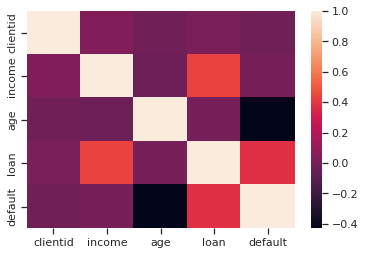

In [ ]:
sns.heatmap(data.corr())


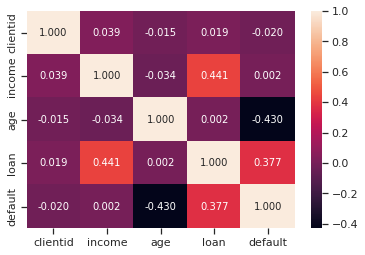

In [ ]:
# Вывод значений в ячейках
sns.heatmap(data.corr(), annot=True, fmt='.3f')

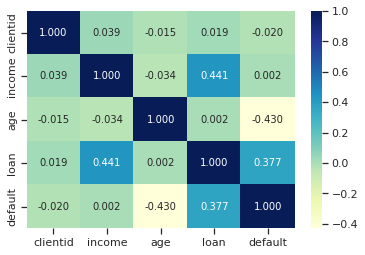

In [ ]:
# Изменение цветовой гаммы
sns.heatmap(data.corr(), cmap='YlGnBu', annot=True, fmt='.3f')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


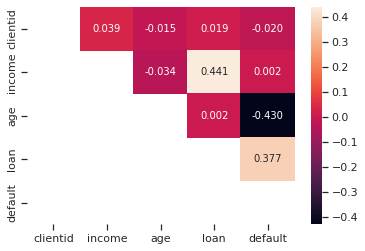

In [ ]:
# Треугольный вариант матрицы
mask = np.zeros_like(data.corr(), dtype=np.bool)
# чтобы оставить нижнюю часть матрицы
# mask[np.triu_indices_from(mask)] = True
# чтобы оставить верхнюю часть матрицы
mask[np.tril_indices_from(mask)] = True
sns.heatmap(data.corr(), mask=mask, annot=True, fmt='.3f')

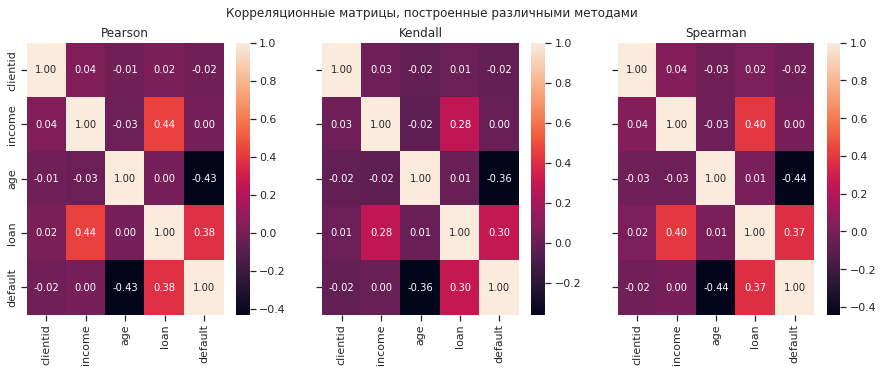

In [ ]:
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(15,5))
sns.heatmap(data.corr(method='pearson'), ax=ax[0], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='kendall'), ax=ax[1], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='spearman'), ax=ax[2], annot=True, fmt='.2f')
fig.suptitle('Корреляционные матрицы, построенные различными методами')
ax[0].title.set_text('Pearson')
ax[1].title.set_text('Kendall')
ax[2].title.set_text('Spearman')


Необходимо отметить, что тепловая карта не очень хорошо подходит для определения корреляции нецелевых признаков между собой.

В примере тепловая карта помогает определить значимую корреляцию между признаками loan и income, следовательно только один из этих признаков можно включать в модель.

Но в реальной модели могут быть сотни признаков и коррелирующие признаки могут образовывать группы, состояшие более чем из двух признаков. Увидеть такие группы с помощью тепловой карты сложно.

Для решения задачи предлагается новый вариант визуализации - "Солнечная корреляционная карта" Solar correlation map.

К сожалению, данная библиотека пока работает только через файловый интерфейс и не предназначена для встраивания в ноутбук.

Примеры статей с описанием работы библиотеки:

https://www.oreilly.com/learning/a-new-visualization-to-beautifully-explore-correlations
https://www.mtab.com/the-puzzle-of-visualizing-correlations/